Acurácia
Recall:
- Não pode estar muito distante
- Se a recall da classe 1 supera a da classe 0, existe um overfit na classe 1
- Ver "somas" das classes do lado esquerdo ou direito for diferenca mt grande, mostra viés
- Maior erro a prever classe 0 do que classe 1

In [18]:
import pickle as pkl
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data_test = pd.read_csv('LeonardoGit/models/datasets/df_test.csv')

In [8]:
data_test_norm = pd.read_csv('LeonardoGit/models/datasets/test_normalize.csv')

### Estes modelos foram tratados com os datasets tratados, mas sem serem normalizados

In [10]:
KNN = pickle.load(open('models/modeloKNN.pkl','rb'))
RandomForest = pickle.load(open('models/modeloRandomForest.pkl','rb'))

In [12]:
def plot_cm(y_true, y_pred, figsize=(6,6)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    ax.xaxis.set_ticklabels(['<=50K/Y', '>50K/Y'])
    ax.yaxis.set_ticklabels(['<=50K/Y', '>50K/Y'])
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

In [19]:
def trainModel(df_test, model):
    X_test = df_test.drop("target", axis = 1)
    y_test = df_test.target
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print('Acurácia:\n', acc)
    print('Report dos parametros:\n')
    print (classification_report(y_test, y_pred))
    print('Matriz de confusão:\n')
    plot_cm(y_test, y_pred)

Acurácia:
 0.8351925630810093
Report dos parametros:

              precision    recall  f1-score   support

           0       0.86      0.93      0.89     11360
           1       0.71      0.56      0.62      3700

    accuracy                           0.84     15060
   macro avg       0.79      0.74      0.76     15060
weighted avg       0.83      0.84      0.83     15060

Matriz de confusão:



<ipython-input-12-d4a32cf3cb7c>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(['<=50K/Y', '>50K/Y'])
<ipython-input-12-d4a32cf3cb7c>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_ticklabels(['<=50K/Y', '>50K/Y'])


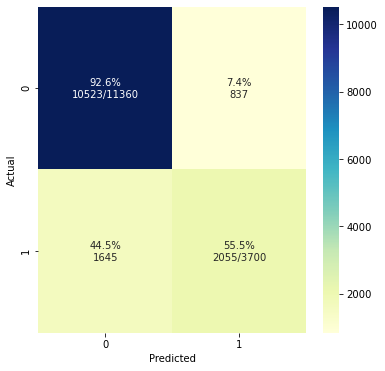

In [20]:
trainModel(data_test,KNN)

Acurácia:
 0.8096281540504648
Report dos parametros:

              precision    recall  f1-score   support

           0       0.92      0.82      0.87     11360
           1       0.59      0.77      0.67      3700

    accuracy                           0.81     15060
   macro avg       0.75      0.80      0.77     15060
weighted avg       0.84      0.81      0.82     15060

Matriz de confusão:



<ipython-input-12-d4a32cf3cb7c>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(['<=50K/Y', '>50K/Y'])
<ipython-input-12-d4a32cf3cb7c>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_ticklabels(['<=50K/Y', '>50K/Y'])


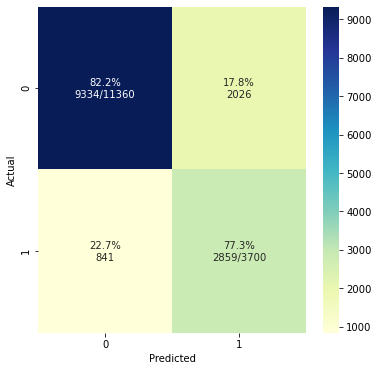

In [21]:
trainModel(data_test,RandomForest)